# Credit card fraud detection capstone project

In [115]:
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import imblearn
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score


#pd.set_option('display.max_rows',None)
pd.reset_option("display.max_rows")
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [74]:
fraudPD = pd.read_csv('..\CreditCardFraudDetectionData\IEEE-CIS Fraud Detection-Transactions.csv')

In [75]:
pd.set_option('display.max_columns', None)
fraudPD.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [76]:
fraudPD.shape

(590540, 394)

In [86]:
fraudPD.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
dist2             552913
P_emaildomain      94456
R_emaildomain     453249
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                  1269
D2                280797
D3                262878
D4                168922
D5                309841
D6                517353
D7                551623
D8                515614
D9                515614


In [67]:
fraudPD['time'] = fraudPD['TransactionDT'].apply(lambda x: datetime.fromtimestamp(x).strftime("%A, %B %d, %Y %I:%M:%S"))

In [6]:
fraudPD.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,time
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Thursday, January 01, 1970 04:00:00"
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0

In [7]:
transGroup = fraudPD[['isFraud','TransactionID']].groupby(['isFraud'], dropna=False).agg('count').reset_index()
transGroup.columns = ['isFraud','count']
transGroup

,isFraud,count
0,0,569877
1,1,20663


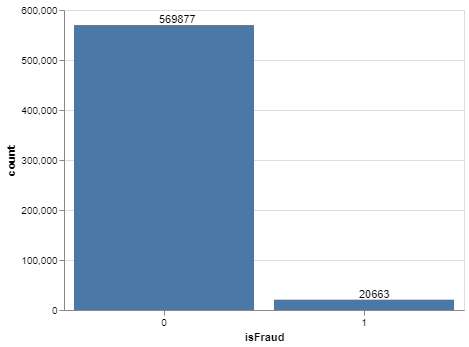

In [8]:
bar_chart=alt.Chart(transGroup).mark_bar().encode(alt.X('isFraud:N', axis=alt.Axis(labelAngle=0)), y='count:Q')
text_chart = bar_chart.mark_text(align='left', baseline='bottom', dx=-5).encode(text='count:Q')
(bar_chart + text_chart).properties(height=300, width=400)

In [9]:
productCDGroup = fraudPD[['ProductCD','TransactionID']].groupby(['ProductCD'], dropna=False).agg('count').reset_index()
productCDGroup.columns = ['ProductCD','count']
productCDGroup

,ProductCD,count
0,C,68519
1,H,33024
2,R,37699
3,S,11628
4,W,439670


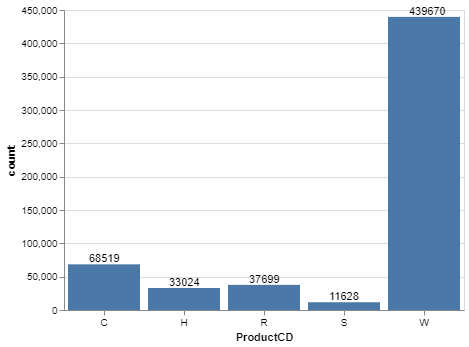

In [10]:
bar_chart=alt.Chart(productCDGroup).mark_bar().encode(alt.X('ProductCD:N', axis=alt.Axis(labelAngle=0)), y='count:Q')
text_chart = bar_chart.mark_text(align='left', baseline='bottom', dx=-15).encode(text='count:Q')
(bar_chart + text_chart).properties(height=300, width=400)

In [11]:
card4Group = fraudPD[['card4','TransactionID']].groupby(['card4'], dropna=False).agg('count').reset_index()
card4Group.columns = ['card4','count']
card4Group

,card4,count
0,american express,8328
1,discover,6651
2,mastercard,189217
3,visa,384767
4,NaN,1577


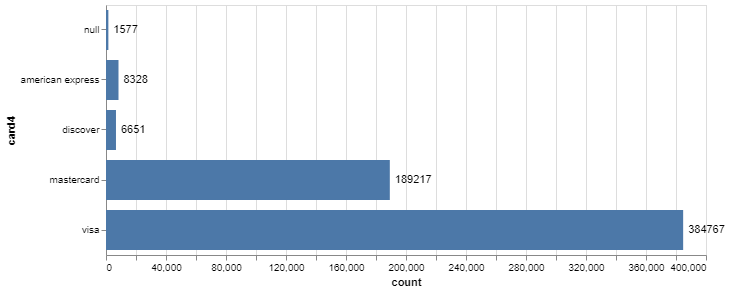

In [12]:
bar_chart=alt.Chart(card4Group).mark_bar(size=40).encode(x='count:Q',y='card4:N')
bar_text = bar_chart.mark_text(align='left', baseline='middle', dx=5).encode(text='count:Q')
(bar_chart + bar_text).properties(height=alt.Step(50), width=600)

In [13]:
card6Group = fraudPD[['card6','TransactionID']].groupby(['card6'], dropna=False).agg('count').reset_index()
card6Group.columns = ['card6','count']
card6Group

,card6,count
0,charge card,15
1,credit,148986
2,debit,439938
3,debit or credit,30
4,NaN,1571


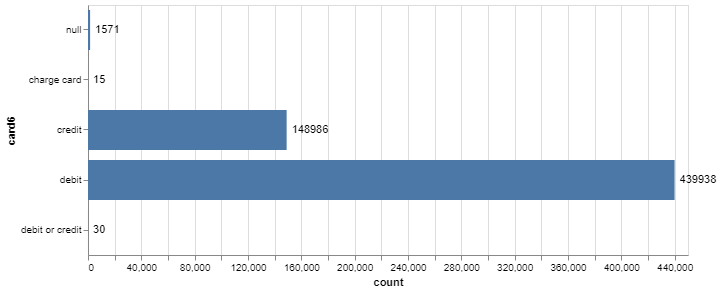

In [14]:
bar_chart=alt.Chart(card6Group).mark_bar(size=40).encode(x='count:Q',y='card6:N')
bar_text = bar_chart.mark_text(align='left', baseline='middle', dx=5).encode(text='count:Q')
(bar_chart + bar_text).properties(height=alt.Step(50), width=600)

In [15]:
card4Group = fraudPD[['card4','TransactionID','isFraud']].groupby(['card4','isFraud'], dropna=False).agg('count').reset_index()
card4Group.columns = ['card4','isFraud','count']
card4Group

,card4,isFraud,count
0,american express,0,8089
1,american express,1,239
2,discover,0,6137
3,discover,1,514
4,mastercard,0,182721
5,mastercard,1,6496
6,visa,0,371394
7,visa,1,13373
8,NaN,0,1536
9,NaN,1,41


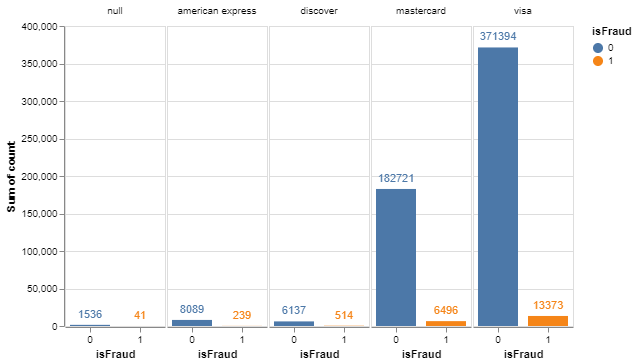

In [16]:
bar_chart = alt.Chart(card4Group).encode(
    alt.X("isFraud:O", axis=alt.Axis(labelAngle=0)),
    alt.Y("sum(count):Q"),
    alt.Color("isFraud:N"),
    alt.Text("sum(count):Q", format=".0f"),
).properties(height=alt.Step(50), width=100)

alt.layer(
    bar_chart.mark_bar(size=40),
    bar_chart.mark_text(dy=-10)
).facet(
    alt.Column("card4:N", title=None)
).configure_facet(spacing=0)


In [17]:
card6Group = fraudPD[['card6','TransactionID','isFraud']].groupby(['card6','isFraud'], dropna=False).agg('count').reset_index()
card6Group.columns = ['card6','isFraud','count']
card6Group

,card6,isFraud,count
0,charge card,0,15
1,credit,0,139036
2,credit,1,9950
3,debit,0,429264
4,debit,1,10674
5,debit or credit,0,30
6,NaN,0,1532
7,NaN,1,39


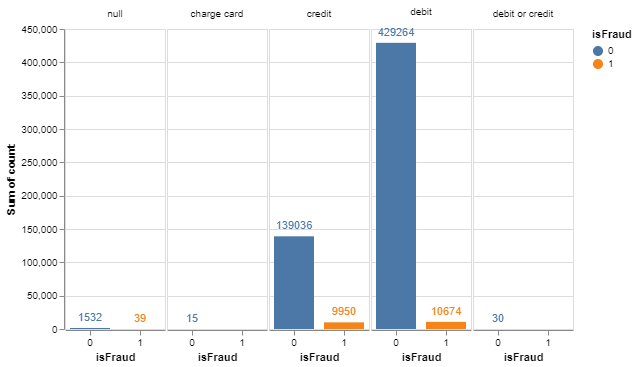

In [18]:
bar_chart = alt.Chart(card6Group).encode(
    alt.X("isFraud:O", axis=alt.Axis(labelAngle=0)),
    alt.Y("sum(count):Q"),
    alt.Color("isFraud:N"),
    alt.Text("sum(count):Q", format=".0f"),
).properties(height=alt.Step(50), width=100)

alt.layer(
    bar_chart.mark_bar(size=40),
    bar_chart.mark_text(dy=-10)
).facet(
    alt.Column("card6:N", title=None)
).configure_facet(spacing=0)

In [19]:
tAmountdf = fraudPD[['isFraud','TransactionAmt']].groupby('isFraud').mean().reset_index()

In [20]:
tAmountdf

,isFraud,TransactionAmt
0,0,134.511665
1,1,149.244779


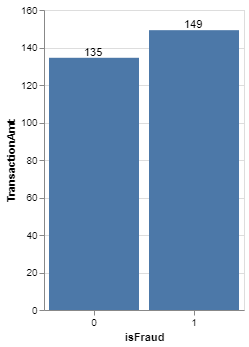

In [21]:
bar_chart=alt.Chart(tAmountdf).mark_bar().encode(
    x=alt.X('isFraud:N', axis=alt.Axis(labelAngle=0)),
    y='TransactionAmt:Q')

bar_text = bar_chart.mark_text(align='left', baseline='bottom', dx=-10).encode(text=alt.X('TransactionAmt:Q', format=".0f"))

(bar_chart + bar_text).properties(width=200)

In [22]:
fraudPD[['TransactionID','P_emaildomain','R_emaildomain']].value_counts().head(10)

TransactionID  P_emaildomain  R_emaildomain
2987010        gmail.com      gmail.com        1
3332109        gmail.com      gmail.com        1
3332088        anonymous.com  gmail.com        1
3332085        anonymous.com  anonymous.com    1
3332077        gmail.com      anonymous.com    1
3332072        yahoo.com      gmail.com        1
3332060        aol.com        gmail.com        1
3332053        verizon.net    verizon.net      1
3332041        anonymous.com  anonymous.com    1
3331941        gmail.com      anonymous.com    1
dtype: int64

In [23]:
fraudMelt=pd.melt(fraudPD[['TransactionID','P_emaildomain','R_emaildomain']], 
        id_vars=['TransactionID'], 
        value_vars=['P_emaildomain', 'R_emaildomain'], ignore_index=False)

fraudMelt=fraudMelt[['variable','value']].value_counts().reset_index()
fraudMelt.columns = ['stakeholder','domain','count']

fraudGrp = fraudMelt[['domain','count']].groupby('domain').sum().sort_values('count', ascending=False).head(5)
fraudGrp

fraudMelt=fraudMelt.merge(fraudGrp, how='inner', on='domain')[['stakeholder','domain','count_x']]
fraudMelt.columns = ['stakeholder','domain','count']

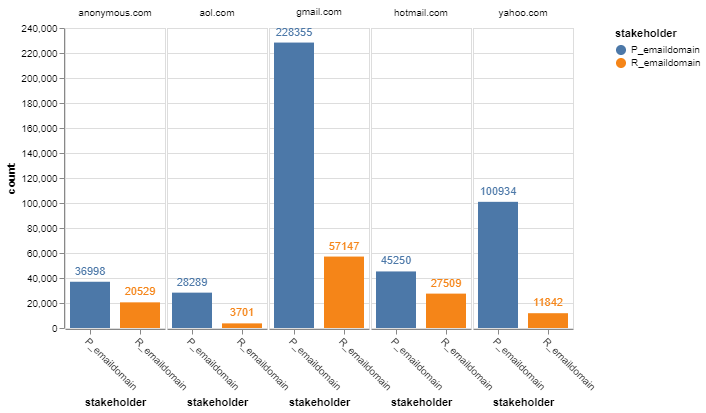

In [24]:
bar_chart = alt.Chart(fraudMelt).encode(
    alt.X("stakeholder:O", axis=alt.Axis(labelAngle=45)),
    alt.Y("count:Q"),
    alt.Color("stakeholder:N"),
    alt.Text("count:Q", format=".0f"),
).properties(height=alt.Step(50), width=100)

alt.layer(
    bar_chart.mark_bar(size=40),
    bar_chart.mark_text(dy=-10)
).facet(
    alt.Column("domain:N", title=None)
).configure_facet(spacing=0)

In [25]:
fraudPD.shape

(590540, 395)

In [26]:
#fraudPD.isna().sum()

In [27]:
fraudPD[['addr2', 'TransactionID']].groupby('addr2').count().sort_values(by='TransactionID', ascending=False).head(10)

,TransactionID
addr2,
87.0,520481
60.0,3084
96.0,638
32.0,91
65.0,82
16.0,55
31.0,47
19.0,33
26.0,25


In [87]:
notnaFraud=fraudPD[['isFraud',
                'TransactionAmt',
                'ProductCD',
                'card1',
                'card4',
                'card6',
                'addr1',
                'addr2',
                'P_emaildomain',
                'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']].dropna()

In [88]:
notnaFraud.shape

(431503, 23)

In [89]:
notnaFraud.isna().sum()

isFraud           0
TransactionAmt    0
ProductCD         0
card1             0
card4             0
card6             0
addr1             0
addr2             0
P_emaildomain     0
C1                0
C2                0
C3                0
C4                0
C5                0
C6                0
C7                0
C8                0
C9                0
C10               0
C11               0
C12               0
C13               0
C14               0
dtype: int64

In [90]:
notnaFraud[['isFraud']].value_counts()

isFraud
0          421091
1           10412
dtype: int64

In [91]:
notnaFraud.head()

,isFraud,TransactionAmt,ProductCD,card1,card4,card6,addr1,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
1,0,29.0,W,2755,mastercard,credit,325.0,87.0,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,0,59.0,W,4663,visa,debit,330.0,87.0,outlook.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,0,50.0,W,18132,mastercard,debit,476.0,87.0,yahoo.com,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0
4,0,50.0,H,4497,mastercard,credit,420.0,87.0,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
5,0,49.0,W,5937,visa,debit,272.0,87.0,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


In [92]:
notnaFraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431503 entries, 1 to 590539
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   isFraud         431503 non-null  int64  
 1   TransactionAmt  431503 non-null  float64
 2   ProductCD       431503 non-null  object 
 3   card1           431503 non-null  int64  
 4   card4           431503 non-null  object 
 5   card6           431503 non-null  object 
 6   addr1           431503 non-null  float64
 7   addr2           431503 non-null  float64
 8   P_emaildomain   431503 non-null  object 
 9   C1              431503 non-null  float64
 10  C2              431503 non-null  float64
 11  C3              431503 non-null  float64
 12  C4              431503 non-null  float64
 13  C5              431503 non-null  float64
 14  C6              431503 non-null  float64
 15  C7              431503 non-null  float64
 16  C8              431503 non-null  float64
 17  C9        

In [93]:
factFraud=notnaFraud[['ProductCD','card4','card6','P_emaildomain']].apply(lambda x : pd.factorize(x)[0])
factFraud.shape

(431503, 4)

In [94]:
fraud=pd.concat([notnaFraud[['TransactionAmt',
                             'card1',
                             'addr1',
                             'addr2','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']], factFraud], axis=1)

In [95]:
fraud.head()

,TransactionAmt,card1,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,ProductCD,card4,card6,P_emaildomain
1,29.0,2755,325.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0,0,0,0
2,59.0,4663,330.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0,1,1,1
3,50.0,18132,476.0,87.0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,0,0,1,2
4,50.0,4497,420.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1,0,0,0
5,49.0,5937,272.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0,1,1,0


<Axes: >

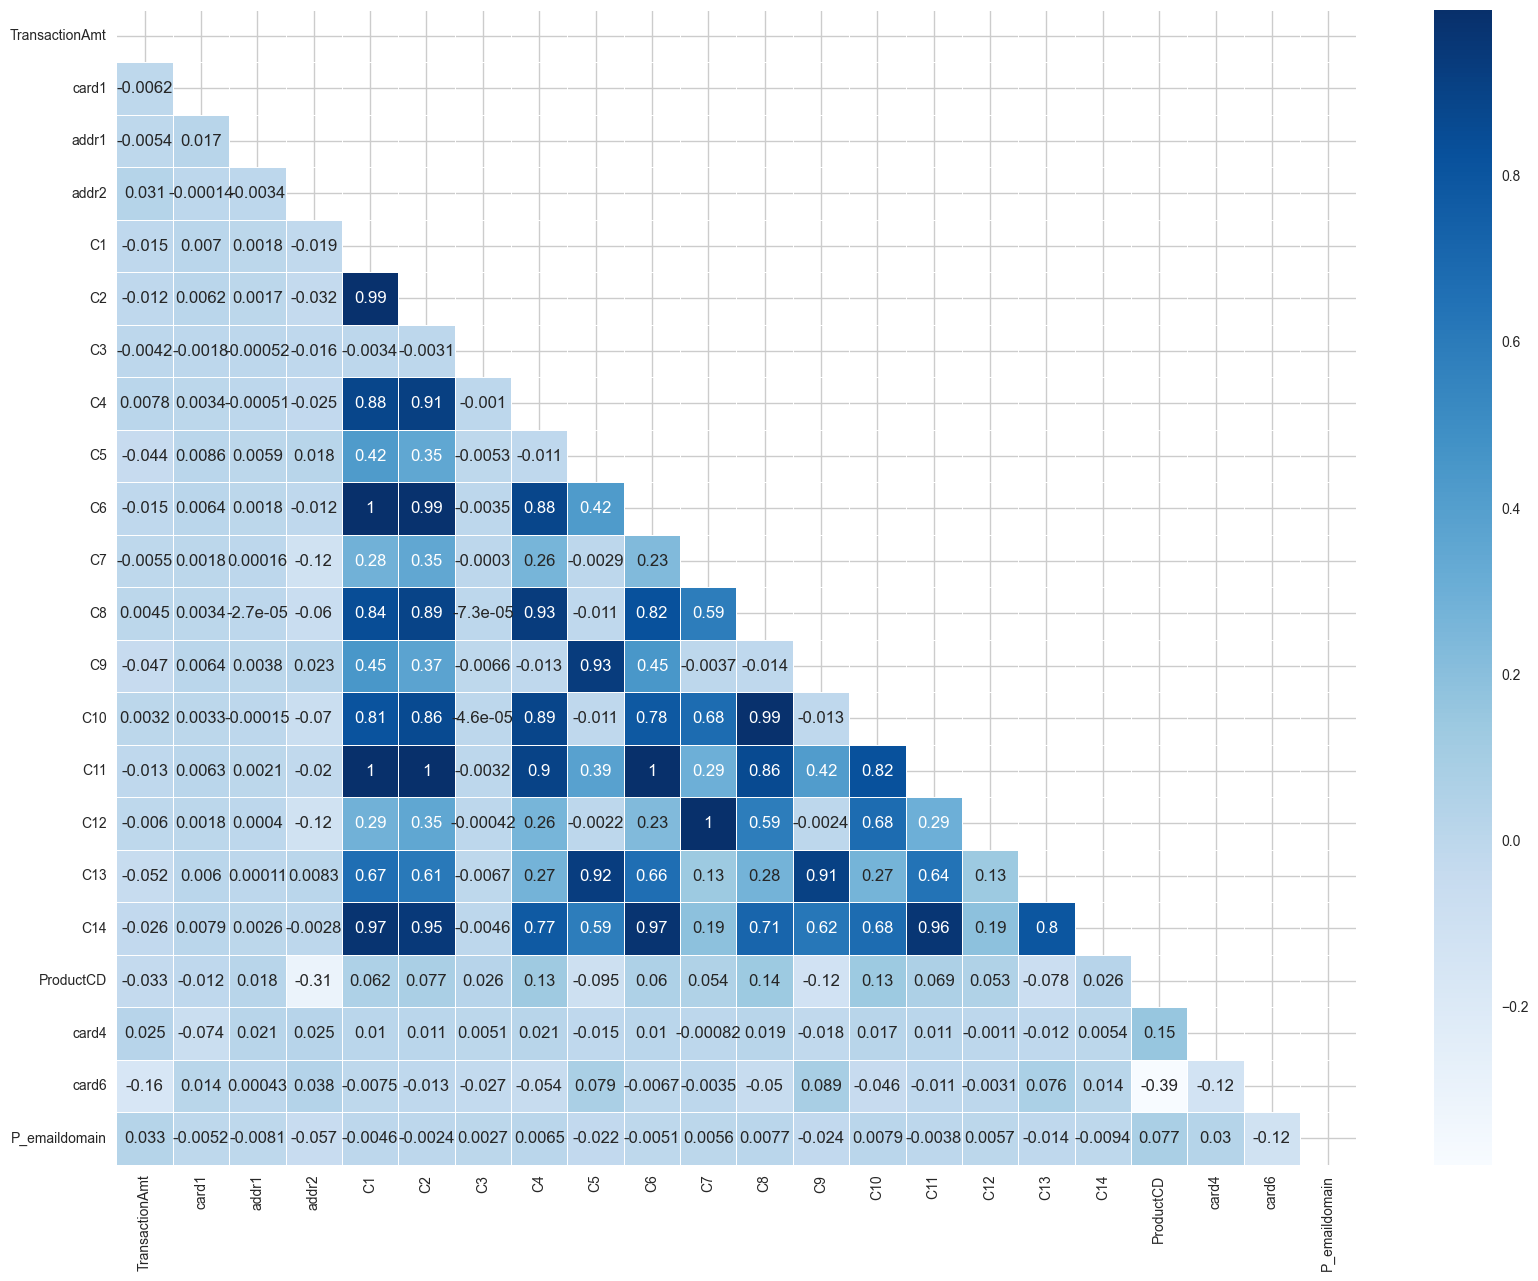

In [96]:
plt.subplots(figsize=(20,15))
sns.heatmap(fraud.corr(), cmap="Blues", annot=True, linewidths=.5, mask=np.triu(fraud.corr()))

In [97]:
fraud=pd.concat([fraud, notnaFraud[['isFraud']]], axis=1)

In [98]:
fraud.head()

,TransactionAmt,card1,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,ProductCD,card4,card6,P_emaildomain,isFraud
1,29.0,2755,325.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0,0,0,0,0
2,59.0,4663,330.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0,1,1,1,0
3,50.0,18132,476.0,87.0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,0,0,1,2,0
4,50.0,4497,420.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1,0,0,0,0
5,49.0,5937,272.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0,1,1,0,0


In [132]:
X=fraud[['TransactionAmt','card1','addr1','addr2','ProductCD','card4','card6','P_emaildomain',
        'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']]
y=fraud['isFraud']

In [133]:
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.20, random_state=17)

In [135]:
my_standard_scaler = StandardScaler()

my_standard_scaler.fit(X_train[['TransactionAmt','card1','addr1','addr2', 
                                'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']])

X_trainScaledfraud = pd.DataFrame(my_standard_scaler.transform(X_train[['TransactionAmt','card1','addr1','addr2',
                                                                       'C1','C2','C3','C4','C5','C6','C7','C8','C9',
                                                                        'C10','C11','C12','C13','C14']])).reset_index()

X_trainTmpFraud = X_train[['ProductCD','card4','card6','P_emaildomain']].reset_index()

X_train=pd.concat([X_trainScaledfraud, X_trainTmpFraud], ignore_index=True, axis=1)

X_train.columns = ['index','TransactionAmt','card1','addr1','addr2', 
                   'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14',
                   'index1', 'ProductCD','card4','card6','P_emaildomain']

X_train=X_train[['TransactionAmt','card1','addr1','addr2', 
                 'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14',
                 'ProductCD','card4','card6','P_emaildomain']]

In [136]:
X_testScaledfraud = pd.DataFrame(my_standard_scaler.transform(X_test[['TransactionAmt','card1','addr1','addr2',
                                                                     'C1','C2','C3','C4','C5','C6','C7','C8',
                                                                      'C9','C10','C11','C12','C13','C14']])).reset_index()

X_testTmpFraud = X_test[['ProductCD','card4','card6','P_emaildomain']].reset_index()

X_test=pd.concat([X_testScaledfraud, X_testTmpFraud], ignore_index=True, axis=1)

X_test.columns = ['index','TransactionAmt','card1','addr1','addr2', 
                  'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14',
                  'index1', 'ProductCD','card4','card6','P_emaildomain']

X_test=X_test[['TransactionAmt','card1','addr1','addr2', 
               'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14',
               'ProductCD','card4','card6','P_emaildomain']]

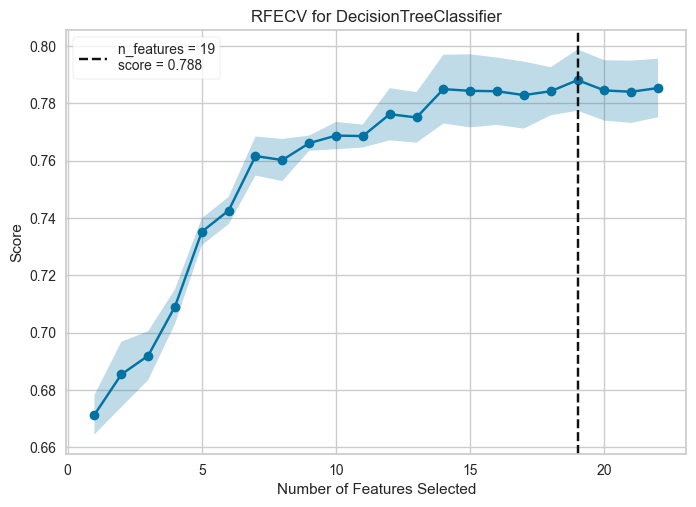

<Axes: title={'center': 'RFECV for DecisionTreeClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [137]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import RFECV

cv = StratifiedKFold(5)
visualizer = RFECV(tree.DecisionTreeClassifier(), cv=cv, scoring='f1_weighted')

visualizer.fit(X_train, y_train)
visualizer.show()

In [142]:
mask = visualizer.get_support()
mask
features = np.array(['TransactionAmt','card1','addr1','addr2', 
                     'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14',
                     'ProductCD','card4','card6','P_emaildomain'])
best_features = features[mask]

print("Selected best: ", best_features.shape[0])
print(features[mask])

Selected best:  19
['TransactionAmt' 'card1' 'addr1' 'C1' 'C2' 'C4' 'C5' 'C6' 'C8' 'C9' 'C10'
 'C11' 'C12' 'C13' 'C14' 'ProductCD' 'card4' 'card6' 'P_emaildomain']


In [143]:
BestX_train = X_train[list(features[mask])]

BestX_test = X_test[list(features[mask])]

In [144]:
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=0)
clf = clf.fit(BestX_train, y_train)

In [145]:
predTree = clf.predict(BestX_test)
print(f"{accuracy_score(y_test, predTree):.2%}")

68.02%


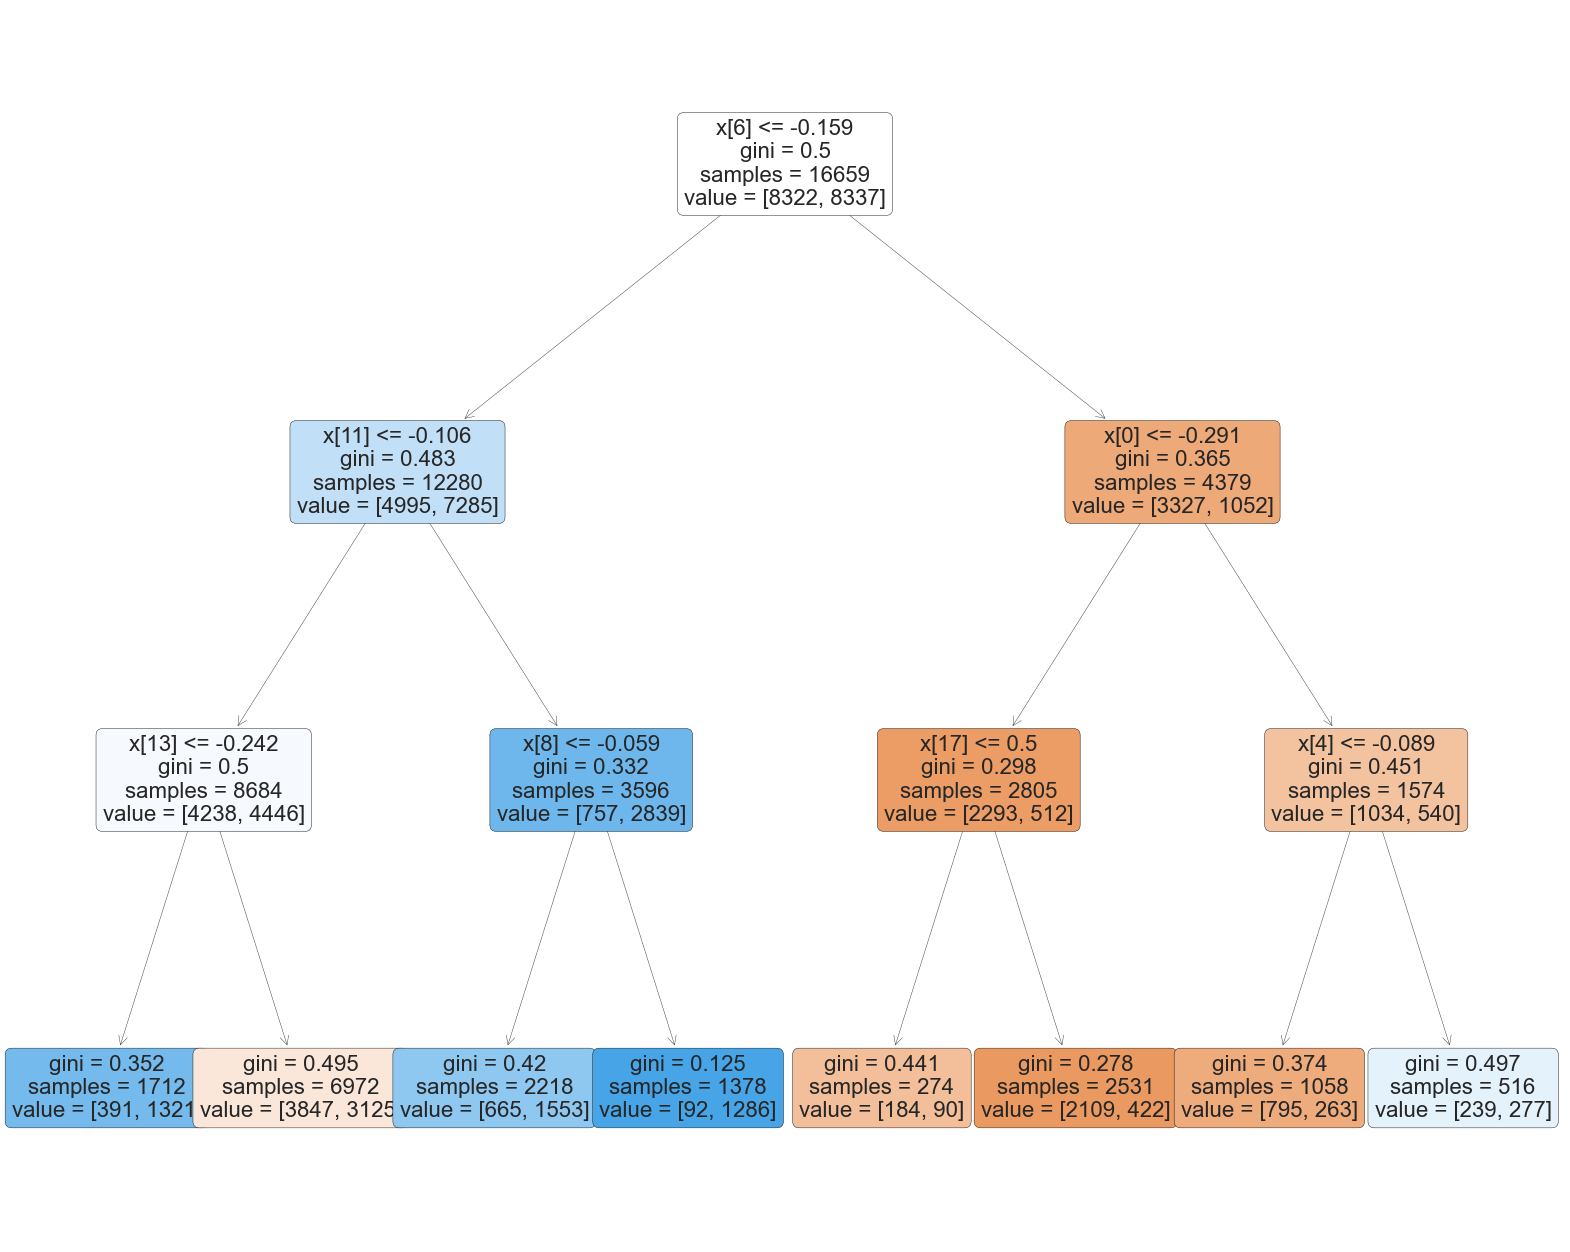

In [146]:
plt.figure(figsize = (20,16))
tree.plot_tree(clf, fontsize = 16,rounded = True , filled = True)
plt.show()